# Cognit

Academic research site

In [1]:
import requests
import pandas as pd
import io
import re
from bs4 import BeautifulSoup

In [2]:
cognit = {}
cognit['title'] = []
cognit['author'] = []
cognit['university'] = []
cognit['link'] = []
cognit['body'] = []

In [ ]:
# Number of pages of results
n_results = 103
for p in range(1,n_results):
  cognit_url = "https://cognit.ca/en/search/researchers?search=well-being+and+(seniors+or+elders)&page="+str(p)+"&years=2018&years=2019&years=2020"
  cognit_page = requests.get(cognit_url)
  soup = BeautifulSoup(cognit_page.content, 'html.parser')
  cognit_div = soup.find_all('div', class_='row b-b pb-2 mb-4')
  for x in range(0,len(cognit_div)):
    cognit_author = cognit_div[x].find_all(class_='col-4')
    cognit_title = cognit_div[x].find_all(class_='pb-3')
    for i in range(0,len(cognit_title)):
      cognit_author2 = cognit_author[0].find_all('a', href=True)
      cognit['author'].append(cognit_author2[0].text)
      cognit_university = cognit_author[0].find_all('li')
      cognit['university'].append(cognit_university[0].text)
      cognit_paper = cognit_title[i].find_all('a', href=True)
      cognit_paper_aux = re.sub(r"\s+", " ", cognit_paper[0].text)
      cognit['title'].append(cognit_paper_aux.strip())
      cognit_link = cognit_title[i].find_all('a', href=True)
      cognit_link2 = "https://cognit.ca" + cognit_link[0].get('href').strip()
      cognit['link'].append(cognit_link2)
print(cognit['link'])

['https://cognit.ca/en/research/project/227836', 'https://cognit.ca/en/research/project/115864', 'https://cognit.ca/en/research/project/146705', 'https://cognit.ca/en/research/project/184001', 'https://cognit.ca/en/research/project/115324', 'https://cognit.ca/en/research/project/187310', 'https://cognit.ca/en/research/project/187144', 'https://cognit.ca/en/research/project/213469', 'https://cognit.ca/en/research/project/230573', 'https://cognit.ca/en/research/project/213469', 'https://cognit.ca/en/research/project/213469', 'https://cognit.ca/en/research/project/230573', 'https://cognit.ca/en/research/project/213469', 'https://cognit.ca/en/research/project/230573', 'https://cognit.ca/en/research/project/232566', 'https://cognit.ca/en/research/project/230475', 'https://cognit.ca/en/research/project/213265', 'https://cognit.ca/en/research/project/180135', 'https://cognit.ca/en/research/project/180207', 'https://cognit.ca/en/research/project/184001', 'https://cognit.ca/en/research/project/

In [ ]:
#Create body field in blank to convert into dataframe and clean before get body (less traffic to cognit site)
for link in cognit['link']:
  cognit['body'].append(' ')

In [ ]:
import pandas as pd

In [ ]:
# Create a dataframe with results
df = pd.DataFrame(cognit)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1293 non-null   object
 1   author      1293 non-null   object
 2   university  1293 non-null   object
 3   link        1293 non-null   object
 4   body        1293 non-null   object
dtypes: object(5)
memory usage: 50.6+ KB


In [ ]:
# Export full results to csv file
df.to_csv('cognit_papers.csv', encoding = 'utf-8-sig')

In [22]:
df = pd.read_csv('cognit_papers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1113 non-null   int64 
 1   Unnamed: 0.1  1113 non-null   int64 
 2   title         1113 non-null   object
 3   author        1113 non-null   object
 4   university    1113 non-null   object
 5   link          1113 non-null   object
 6   body          1113 non-null   object
dtypes: int64(2), object(5)
memory usage: 61.0+ KB


In [23]:
# Delete duplicated but merging the authors
df_group = df.groupby(['title','link','body']).agg(lambda col: ', '.join(col.unique())).reset_index()
df_group

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  


,title,link,body,author,university
0,'What Matters' - A digital solution to support...,https://cognit.ca/en/research/project/232601,,"Leanne Currie, Habib Chaudhury, Lillian M Hung...","University of British Columbia, Simon Fraser U..."
1,5th Annual Toronto Area Memory Group (TAMeG) C...,https://cognit.ca/en/research/project/215195,,Brian T Levine,Baycrest Health Sciences
2,A Critical Comparative Analysis of Integrated ...,https://cognit.ca/en/research/project/148238,,Laura T Kadowaki,Simon Fraser University
3,A collaborative evaluation of the Iiyuu Ahtaaw...,https://cognit.ca/en/research/project/152247,,Mary E Macdonald,McGill University
4,A comprehensive account of price discriminatio...,https://cognit.ca/en/research/project/113373,,Ambarish Chandra,University of Toronto
...,...,...,...,...,...
179,VR Systems for Body Image and Body Schema ( 20...,https://cognit.ca/en/research/project/192279,,Diane Gromala,Simon Fraser University
180,Victorian sociability: an International Worksh...,https://cognit.ca/en/research/project/184077,,Karen A Bourrier,University of Calgary
181,Vulnérabilité et besoin de protection : percep...,https://cognit.ca/en/research/project/183749,,"Dominique Giroux, Nathalie Delli Colli, Christ...","Laval University, Université de Sherbrooke, Un..."
182,Waypoint Research Institute 6th Annual Confere...,https://cognit.ca/en/research/project/180305,,"Barna Konkoly-Thege, Branka Agic",University of Toronto


In [27]:
#Drop patent resources, keep only research
df1 = df_group[df_group['link'].str.lower().str.contains("patent")].index
df_group.drop(df1, inplace = True)

In [6]:
for i in df_group.index:
  url = df_group['link'][i]
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')
  body_full = soup.find_all('div', class_='card-body')
  body_full2 = body_full[6].text.strip()
  df_group['body'][i] = body_full2
  #print("Ready",i)

In [7]:
df_work = df_group

In [8]:
df_group

,title,link,body,author,university
0,'What Matters' - A digital solution to support...,https://cognit.ca/en/research/project/232601,Canada's aging population and the increasing p...,"Leanne Currie, Habib Chaudhury, Lillian M Hung...","University of British Columbia, Simon Fraser U..."
1,5th Annual Toronto Area Memory Group (TAMeG) C...,https://cognit.ca/en/research/project/215195,The greater Toronto and Southern Ontario regio...,Brian T Levine,Baycrest Health Sciences
2,A Critical Comparative Analysis of Integrated ...,https://cognit.ca/en/research/project/148238,Canada is currently undergoing a period of rap...,Laura T Kadowaki,Simon Fraser University
3,A collaborative evaluation of the Iiyuu Ahtaaw...,https://cognit.ca/en/research/project/152247,The goal for this project is to evaluate a maj...,Mary E Macdonald,McGill University
4,A comprehensive account of price discriminatio...,https://cognit.ca/en/research/project/113373,This proposal provides a new perspective on a ...,Ambarish Chandra,University of Toronto
...,...,...,...,...,...
179,VR Systems for Body Image and Body Schema ( 20...,https://cognit.ca/en/research/project/192279,Recent research in the emerging field of embod...,Diane Gromala,Simon Fraser University
180,Victorian sociability: an International Worksh...,https://cognit.ca/en/research/project/184077,VICTORIAN SOCIABILITY: AN INTERNATIONAL WORKSH...,Karen A Bourrier,University of Calgary
181,Vulnérabilité et besoin de protection : percep...,https://cognit.ca/en/research/project/183749,Problématique: Le vieillissement peut conduire...,"Dominique Giroux, Nathalie Delli Colli, Christ...","Laval University, Université de Sherbrooke, Un..."
182,Waypoint Research Institute 6th Annual Confere...,https://cognit.ca/en/research/project/180305,"Waypoint Centre for Mental Health Care, Peneta...","Barna Konkoly-Thege, Branka Agic",University of Toronto


In [9]:
#Drop patent resources, keep only research
df1 = df_group[df_group['link'].str.lower().str.contains("patent")].index
df_group.drop(df1, inplace = True)

In [28]:
# Delete rows with "No summary" on body field
df_group = df_group[df_group.body != "No summary"]
df_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 183
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       183 non-null    object
 1   link        183 non-null    object
 2   body        183 non-null    object
 3   author      183 non-null    object
 4   university  183 non-null    object
dtypes: object(5)
memory usage: 8.6+ KB


In [32]:
# Delete rows with latin vowels on body field
vowels = ["á","é","í","ó","ú"]
df_group = df_group[~df_group['title'].str.lower().str.contains('|'.join(vowels), case=False)]
df_group = df_group[~df_group['body'].str.lower().str.contains('|'.join(vowels), case=False)]
df_group

,title,link,body,author,university
0,'What Matters' - A digital solution to support...,https://cognit.ca/en/research/project/232601,,"Leanne Currie, Habib Chaudhury, Lillian M Hung...","University of British Columbia, Simon Fraser U..."
1,5th Annual Toronto Area Memory Group (TAMeG) C...,https://cognit.ca/en/research/project/215195,,Brian T Levine,Baycrest Health Sciences
2,A Critical Comparative Analysis of Integrated ...,https://cognit.ca/en/research/project/148238,,Laura T Kadowaki,Simon Fraser University
3,A collaborative evaluation of the Iiyuu Ahtaaw...,https://cognit.ca/en/research/project/152247,,Mary E Macdonald,McGill University
4,A comprehensive account of price discriminatio...,https://cognit.ca/en/research/project/113373,,Ambarish Chandra,University of Toronto
...,...,...,...,...,...
177,Using Population Based Data to Guide Fetal Alc...,https://cognit.ca/en/research/project/148734,,Deepa Singal,University of Manitoba
178,Using photovoice to capture the housing-relate...,https://cognit.ca/en/research/project/187391,,Anh P Ngo,Wilfrid Laurier University
179,VR Systems for Body Image and Body Schema ( 20...,https://cognit.ca/en/research/project/192279,,Diane Gromala,Simon Fraser University
180,Victorian sociability: an International Worksh...,https://cognit.ca/en/research/project/184077,,Karen A Bourrier,University of Calgary


In [12]:
# Export unique results to csv
df_group.to_csv('cognit_papers_unique.csv', encoding = 'utf-8-sig')

In [13]:
df = pd.read_csv('cognit_papers_unique.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  149 non-null    int64 
 1   title       149 non-null    object
 2   link        149 non-null    object
 3   body        149 non-null    object
 4   author      149 non-null    object
 5   university  149 non-null    object
dtypes: int64(1), object(5)
memory usage: 7.1+ KB


In [34]:
df_group

,title,link,body,author,university
0,'What Matters' - A digital solution to support...,https://cognit.ca/en/research/project/232601,,"Leanne Currie, Habib Chaudhury, Lillian M Hung...","University of British Columbia, Simon Fraser U..."
1,5th Annual Toronto Area Memory Group (TAMeG) C...,https://cognit.ca/en/research/project/215195,,Brian T Levine,Baycrest Health Sciences
2,A Critical Comparative Analysis of Integrated ...,https://cognit.ca/en/research/project/148238,,Laura T Kadowaki,Simon Fraser University
3,A collaborative evaluation of the Iiyuu Ahtaaw...,https://cognit.ca/en/research/project/152247,,Mary E Macdonald,McGill University
4,A comprehensive account of price discriminatio...,https://cognit.ca/en/research/project/113373,,Ambarish Chandra,University of Toronto
...,...,...,...,...,...
177,Using Population Based Data to Guide Fetal Alc...,https://cognit.ca/en/research/project/148734,,Deepa Singal,University of Manitoba
178,Using photovoice to capture the housing-relate...,https://cognit.ca/en/research/project/187391,,Anh P Ngo,Wilfrid Laurier University
179,VR Systems for Body Image and Body Schema ( 20...,https://cognit.ca/en/research/project/192279,,Diane Gromala,Simon Fraser University
180,Victorian sociability: an International Worksh...,https://cognit.ca/en/research/project/184077,,Karen A Bourrier,University of Calgary


In [35]:
df_group['university'].value_counts().count()

98

In [36]:
df_group['author'].value_counts().count()

157

Text(0, 0.5, '# publications')

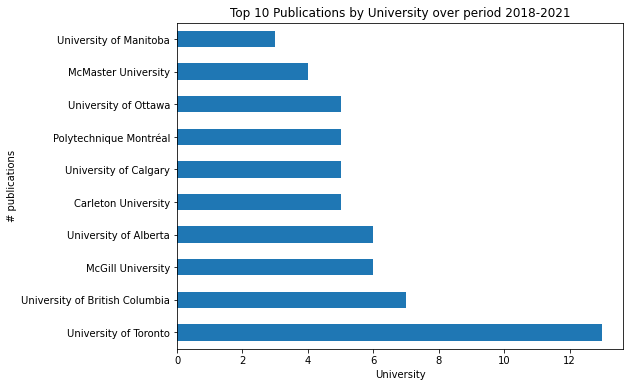

In [37]:
from matplotlib import pyplot as plt
df_group['university'].value_counts()[:10].plot(kind="barh", figsize=(8,6))
plt.title("Top 10 Publications by University over period 2018-2021")
plt.xlabel("University")
plt.ylabel("# publications")

Text(0, 0.5, '# publications')

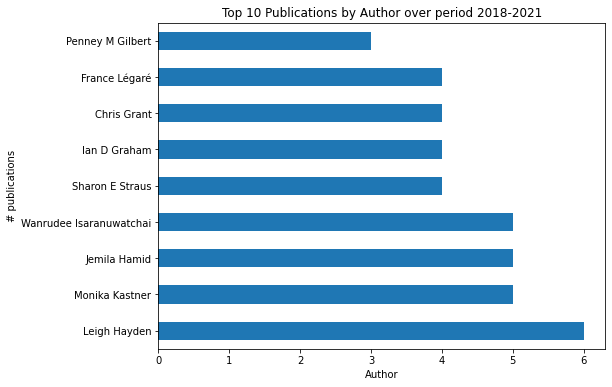

In [39]:
df['author'].value_counts()[1:10].plot(kind="barh", figsize=(8,6))
plt.title("Top 10 Publications by Author over period 2018-2021")
plt.xlabel("Author")
plt.ylabel("# publications")